In [34]:
import folium
from folium import plugins
import requests
import pandas as pd

# GeoJSON 데이터의 URL
url = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

raw_data = [
    ['양천구', 0.25],
    ['영등포구', 0.24],
    ['중랑구', 0.24],
    ['구로구', 0.23],
    ['강남구', 0.22],
    ['송파구', 0.21],
    ['광진구', 0.21],
    ['강동구', 0.2],
    ['종로구', 0.19],
    ['강북구', 0.19],
    ['서초구', 0.19],
    ['성북구', 0.19],
    ['금천구', 0.19],
    ['은평구', 0.18],
    ['동대문구', 0.18],
    ['노원구', 0.17],
    ['강서구', 0.17],
    ['동작구', 0.17],
    ['용산구', 0.16],
    ['도봉구', 0.16],
    ['중구', 0.16],
    ['마포구', 0.16],
    ['서대문구', 0.15],
    ['성동구', 0.13],
    ['관악구', 0.12],
]

data = pd. DataFrame(raw_data, columns=['name','value'])
data

# GeoJSON 데이터 불러오기
response = requests.get(url)
geojson_data = response.json()

# 서울시 중심의 지도 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# GeoJSON 데이터를 지도에 추가
folium.GeoJson(geojson_data, name="geojson").add_to(seoul_map)

# 지도를 HTML 파일로 저장
seoul_map.save("seoul_map.html")

# 지도를 화면에 표시
seoul_map

In [35]:
#!pip install geopandas

In [36]:
import folium

geo_json =  "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

import pandas as pd

raw_data = [
    ['양천구', 0.25],
    ['영등포구', 0.24],
    ['중랑구', 0.24],
    ['구로구', 0.23],
    ['강남구', 0.22],
    ['송파구', 0.21],
    ['광진구', 0.21],
    ['강동구', 0.2],
    ['종로구', 0.19],
    ['강북구', 0.19],
    ['서초구', 0.19],
    ['성북구', 0.19],
    ['금천구', 0.19],
    ['은평구', 0.18],
    ['동대문구', 0.18],
    ['노원구', 0.17],
    ['강서구', 0.17],
    ['동작구', 0.17],
    ['용산구', 0.16],
    ['도봉구', 0.16],
    ['중구', 0.16],
    ['마포구', 0.16],
    ['서대문구', 0.15],
    ['성동구', 0.13],
    ['관악구', 0.12],
]

data = pd. DataFrame(raw_data, columns=['name','value'])

m = folium.Map(location=[37.566345,126.977893])

folium.Choropleth(geo_data=geo_json,
                  name='choropleth',
                  data=data,columns=['name','value'],
                  key_on='feature.properties.name',
                  fill_color='Reds',
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  highlight=True,
                  ).add_to(m)
m

In [37]:
import folium
import pandas as pd
import json

geo_json_url = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
geo_json_data = json.loads(requests.get(geo_json_url).text)

raw_data = [
    ['양천구', 0.25],
    ['영등포구', 0.24],
    ['중랑구', 0.24],
    ['구로구', 0.23],
    ['강남구', 0.22],
    ['송파구', 0.21],
    ['광진구', 0.21],
    ['강동구', 0.2],
    ['종로구', 0.19],
    ['강북구', 0.19],
    ['서초구', 0.19],
    ['성북구', 0.19],
    ['금천구', 0.19],
    ['은평구', 0.18],
    ['동대문구', 0.18],
    ['노원구', 0.17],
    ['강서구', 0.17],
    ['동작구', 0.17],
    ['용산구', 0.16],
    ['도봉구', 0.16],
    ['중구', 0.16],
    ['마포구', 0.16],
    ['서대문구', 0.15],
    ['성동구', 0.13],
    ['관악구', 0.12],
]

data = pd.DataFrame(raw_data, columns=['name', 'value'])

m = folium.Map(location=[37.566345, 126.977893])

folium.Choropleth(
    geo_data=geo_json_url,
    name='choropleth',
    data=data,
    columns=['name', 'value'],
    key_on='feature.properties.name',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight=True,
).add_to(m)

# 각 구에 대한 텍스트를 직접 지도에 표시
for _, row in data.iterrows():
    for feature in geo_json_data['features']:
        if feature['properties']['name'] == row['name']:
            coordinates = feature['geometry']['coordinates'][0][0]
            folium.map.Marker(
                location=[coordinates[1], coordinates[0]],
                icon=folium.DivIcon(html=f"<div style='font-size: 12; color: black;'>{row['name']}</div>")
            ).add_to(m)

m

In [38]:
# 지역구별 어린이 수 대비 사고수

import folium
import pandas as pd

geo_json = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

raw_data = [
    ['양천구', 0.25],
    ['영등포구', 0.24],
    ['중랑구', 0.24],
    ['구로구', 0.23],
    ['강남구', 0.22],
    ['송파구', 0.21],
    ['광진구', 0.21],
    ['강동구', 0.2],
    ['종로구', 0.19],
    ['강북구', 0.19],
    ['서초구', 0.19],
    ['성북구', 0.19],
    ['금천구', 0.19],
    ['은평구', 0.18],
    ['동대문구', 0.18],
    ['노원구', 0.17],
    ['강서구', 0.17],
    ['동작구', 0.17],
    ['용산구', 0.16],
    ['도봉구', 0.16],
    ['중구', 0.16],
    ['마포구', 0.16],
    ['서대문구', 0.15],
    ['성동구', 0.13],
    ['관악구', 0.12],
]

data = pd.DataFrame(raw_data, columns=['name', 'value'])

m = folium.Map(location=[37.566345, 126.977893])

folium.Choropleth(geo_data=geo_json,
                  name='choropleth',
                  data=data, columns=['name', 'value'],
                  key_on='feature.properties.name',
                  fill_color='Reds',
                  fill_opacity=0.7,
                  line_opacity=0.5,  # 경계선 투명도
                  line_color='black',  # 경계선 색상
                  line_weight=2,  # 경계선 굵기
                  highlight=True,
                  ).add_to(m)

# 구별 중심 좌표 및 텍스트 추가
centers = {
    '종로구': [37.5949159, 126.977339],
    '중구': [37.5601443, 126.9959649],
    '용산구': [37.5313805, 126.9798839],
    '성동구': [37.5510171, 127.0410394],
    '광진구': [37.5467284, 127.0857543],
    '동대문구': [37.5819561, 127.054846],
    '중랑구': [37.5978139, 127.0928927],
    '성북구': [37.6056991, 127.0175664],
    '강북구': [37.6434801, 127.0111839],
    '도봉구': [37.6691065, 127.0323527],
    '노원구': [37.6525076, 127.075042],
    '은평구': [37.6191784, 126.9270142],
    '서대문구': [37.5777796, 126.9390623],
    '마포구': [37.5593115, 126.9082589],
    '양천구': [37.5247402, 126.8553909],
    '강서구': [37.5612346, 126.8228132],
    '구로구': [37.4944134, 126.8563336],
    '금천구': [37.4605655, 126.9008183],
    '영등포구': [37.5223245, 126.9101692],
    '동작구': [37.4988794, 126.9516345],
    '관악구': [37.4673709, 126.9453359],
    '서초구': [37.4732933, 127.0312101],
    '강남구': [37.4966645, 127.0629804],
    '송파구': [37.5056205, 127.1152992],
    '강동구': [37.5504483, 127.1470117],
}

for name, coords in centers.items():
    folium.Marker(
        location=coords,
        icon=folium.DivIcon(html=f"<div style='font-size: 12; color: white; text-align: center;"
                                  f" background-color: transparent; text-shadow: -1px -1px 2px #000;'>{name}</div>")
    ).add_to(m)

m

In [39]:
import folium
from folium import plugins
import pandas as pd

geo_json = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

raw_data = [
    ['양천구', 0.25],
    ['영등포구', 0.24],
    ['중랑구', 0.24],
    ['구로구', 0.23],
    ['강남구', 0.22],
    ['송파구', 0.21],
    ['광진구', 0.21],
    ['강동구', 0.2],
    ['종로구', 0.19],
    ['강북구', 0.19],
    ['서초구', 0.19],
    ['성북구', 0.19],
    ['금천구', 0.19],
    ['은평구', 0.18],
    ['동대문구', 0.18],
    ['노원구', 0.17],
    ['강서구', 0.17],
    ['동작구', 0.17],
    ['용산구', 0.16],
    ['도봉구', 0.16],
    ['중구', 0.16],
    ['마포구', 0.16],
    ['서대문구', 0.15],
    ['성동구', 0.13],
    ['관악구', 0.12],
]

data = pd.DataFrame(raw_data, columns=['name', 'value'])

m = folium.Map(location=[37.566345, 126.977893], zoom_start=12)

# Choropleth 추가
folium.Choropleth(geo_data=geo_json,
                  name='choropleth',
                  data=data, columns=['name', 'value'],
                  key_on='feature.properties.name',
                  fill_color='Reds',
                  fill_opacity=0.7,
                  line_opacity=0.5,  # 경계선 투명도
                  line_color='black',  # 경계선 색상
                  line_weight=2,  # 경계선 굵기
                  highlight=True,
                  ).add_to(m)

# 구별 중심 좌표 및 텍스트 추가
centers = {
    '종로구': [37.5949159, 126.977339],
    '중구': [37.5601443, 126.9959649],
    '용산구': [37.5313805, 126.9798839],
    '성동구': [37.5510171, 127.0410394],
    '광진구': [37.5467284, 127.0857543],
    '동대문구': [37.5819561, 127.054846],
    '중랑구': [37.5978139, 127.0928927],
    '성북구': [37.6056991, 127.0175664],
    '강북구': [37.6434801, 127.0111839],
    '도봉구': [37.6691065, 127.0323527],
    '노원구': [37.6525076, 127.075042],
    '은평구': [37.6191784, 126.9270142],
    '서대문구': [37.5777796, 126.9390623],
    '마포구': [37.5593115, 126.9082589],
    '양천구': [37.5247402, 126.8553909],
    '강서구': [37.5612346, 126.8228132],
    '구로구': [37.4944134, 126.8563336],
    '금천구': [37.4605655, 126.9008183],
    '영등포구': [37.5223245, 126.9101692],
    '동작구': [37.4988794, 126.9516345],
    '관악구': [37.4673709, 126.9453359],
    '서초구': [37.4732933, 127.0312101],
    '강남구': [37.4966645, 127.0629804],
    '송파구': [37.5056205, 127.1152992],
    '강동구': [37.5504483, 127.1470117],
}

for name, coords in centers.items():
    folium.Marker(
        location=coords,
        icon=folium.DivIcon(html=f"<div style='font-size: 12; color: white; text-align: center;"
                                  f" background-color: transparent; text-shadow: -1px -1px 2px #000;'>{name}</div>")
    ).add_to(m)

# MiniMap 추가
minimap = plugins.MiniMap()
m.add_child(minimap)

# 제목 추가
title_html = '''
             <h3 align="center" style="font-size:20px"><b>서울특별시 구별 총인구수 대비 어린이 교통사고 건수</b></h3>
             '''

m.get_root().html.add_child(folium.Element(title_html))

# HTML 파일로 저장
m.save('서울특별시 구별 총인구수 대비 어린이 교통사고 건수.html')

In [40]:
import webbrowser

# 생성된 HTML 파일 열기
webbrowser.open('서울특별시 구별 총인구수 대비 어린이 교통사고 건수.html')

True

In [41]:
import pandas as pd

# 주어진 데이터
data = {
    '지역구': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
    '거주자': [145714, 121926, 218691, 295428, 346032, 339364, 391196, 434848, 308385, 329039, 527045, 471936, 302628, 366365, 452784, 584804, 401965, 228716, 360215, 390198, 492126, 422317, 532911, 666686, 429637],
    '사고수': [28, 19, 36, 38, 72, 60, 95, 82, 59, 54, 92, 85, 44, 57, 114, 99, 94, 43, 88, 66, 58, 80, 115, 140, 87]
}

df = pd.DataFrame(data)

# 어린이 교통사고 비율 계산
df['어린이교통사고비율'] = (df['사고수'] / df['거주자']) * 1000

print(df[['지역구', '어린이교통사고비율']])

     지역구  어린이교통사고비율
0    종로구   0.192157
1     중구   0.155832
2    용산구   0.164616
3    성동구   0.128627
4    광진구   0.208073
5   동대문구   0.176801
6    중랑구   0.242845
7    성북구   0.188572
8    강북구   0.191319
9    도봉구   0.164114
10   노원구   0.174558
11   은평구   0.180109
12  서대문구   0.145393
13   마포구   0.155583
14   양천구   0.251776
15   강서구   0.169287
16   구로구   0.233851
17   금천구   0.188006
18  영등포구   0.244299
19   동작구   0.169145
20   관악구   0.117856
21   서초구   0.189431
22   강남구   0.215796
23   송파구   0.209994
24   강동구   0.202497


In [42]:
import folium
from folium import plugins
import pandas as pd

geo_json = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

raw_data = [
    ['종로구', 0.192157],
    ['중구', 0.155832],
    ['용산구', 0.164616],
    ['성동구', 0.128627],
    ['광진구', 0.208073],
    ['동대문구', 0.176801],
    ['중랑구', 0.242845],
    ['성북구', 0.188572],
    ['강북구', 0.191319],
    ['도봉구', 0.164114],
    ['노원구', 0.174558],
    ['은평구', 0.180109],
    ['서대문구', 0.145393],
    ['마포구', 0.155583],
    ['양천구', 0.251776],
    ['강서구', 0.169287],
    ['구로구', 0.233851],
    ['금천구', 0.188006],
    ['영등포구', 0.244299],
    ['동작구', 0.169145],
    ['관악구', 0.117856],
    ['서초구', 0.189431],
    ['강남구', 0.215796],
    ['송파구', 0.209994],
    ['강동구', 0.202497],
]

data = pd.DataFrame(raw_data, columns=['name', 'value'])

m = folium.Map(location=[37.566345, 126.977893], zoom_start=12)

# Choropleth 추가
folium.Choropleth(geo_data=geo_json,
                  name='choropleth',
                  data=data, columns=['name', 'value'],
                  key_on='feature.properties.name',
                  fill_color='Reds',
                  fill_opacity=0.7,
                  line_opacity=0.5,  # 경계선 투명도
                  line_color='black',  # 경계선 색상
                  line_weight=2,  # 경계선 굵기
                  highlight=True,
                  ).add_to(m)

# 구별 중심 좌표 및 텍스트 추가
centers = {
    '종로구': [37.5949159, 126.977339],
    '중구': [37.5601443, 126.9959649],
    '용산구': [37.5313805, 126.9798839],
    '성동구': [37.5510171, 127.0410394],
    '광진구': [37.5467284, 127.0857543],
    '동대문구': [37.5819561, 127.054846],
    '중랑구': [37.5978139, 127.0928927],
    '성북구': [37.6056991, 127.0175664],
    '강북구': [37.6434801, 127.0111839],
    '도봉구': [37.6691065, 127.0323527],
    '노원구': [37.6525076, 127.075042],
    '은평구': [37.6191784, 126.9270142],
    '서대문구': [37.5777796, 126.9390623],
    '마포구': [37.5593115, 126.9082589],
    '양천구': [37.5247402, 126.8553909],
    '강서구': [37.5612346, 126.8228132],
    '구로구': [37.4944134, 126.8563336],
    '금천구': [37.4605655, 126.9008183],
    '영등포구': [37.5223245, 126.9101692],
    '동작구': [37.4988794, 126.9516345],
    '관악구': [37.4673709, 126.9453359],
    '서초구': [37.4732933, 127.0312101],
    '강남구': [37.4966645, 127.0629804],
    '송파구': [37.5056205, 127.1152992],
    '강동구': [37.5504483, 127.1470117],
}

for name, coords in centers.items():
    folium.Marker(
        location=coords,
        icon=folium.DivIcon(html=f"<div style='font-size: 12; color: white; text-align: center;"
                                  f" background-color: transparent; text-shadow: -1px -1px 2px #000;'>{name}</div>")
    ).add_to(m)

# MiniMap 추가
minimap = plugins.MiniMap()
m.add_child(minimap)

# 제목 추가
title_html = '''
             <h3 align="center" style="font-size:20px"><b>서울특별시 구별 어린이 인구수 대비 어린이 교통사고 건수</b></h3>
             '''



m.get_root().html.add_child(folium.Element(title_html))

# HTML 파일로 저장
m.save('서울특별시 구별 어린이 인구수 대비 어린이 교통사고 건수.html')

In [43]:
import webbrowser

# 생성된 HTML 파일 열기
webbrowser.open('서울특별시 구별 어린이 인구수 대비 어린이 교통사고 건수.html')

True

In [44]:
import pandas as pd

# CSV 파일에서 데이터를 읽어옴
file_path = "서울시 유치원.csv"
df = pd.read_csv(file_path, encoding='euc-kr')

# 주소 컬럼에서 '구' 정보를 추출
df['구'] = df['주소'].str.extract(r'([가-힣]+구)')

# 각 구별로 유치원 개수를 파악
count_by_gu = df['구'].value_counts()

# 원하는 순서로 구 이름 정렬
desired_order = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', 
    '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', 
    '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', 
    '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'
]
count_by_gu = count_by_gu.reindex(desired_order)

# 결과 출력
print(count_by_gu)

구
종로구     17
중구      14
용산구     17
성동구     31
광진구     36
동대문구    33
중랑구     33
성북구     52
강북구     22
도봉구     29
노원구     69
은평구     45
서대문구    23
마포구     26
양천구     47
강서구     59
구로구     35
금천구     19
영등포구    40
동작구     37
관악구     36
서초구     29
강남구     40
송파구     54
강동구     34
Name: count, dtype: int64


In [45]:
import pandas as pd

# CSV 파일에서 데이터를 읽어옴
file_path = "서울시 어린이집.csv"
df = pd.read_csv(file_path, encoding='cp949')

# 지역구별 어린이집 수 세기
count_by_gu = df['지역구'].value_counts()

# 원하는 순서로 구 이름 정렬
desired_order = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', 
    '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', 
    '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', 
    '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'
]
count_by_gu = count_by_gu.reindex(desired_order)

# 결과 출력
print(count_by_gu)

지역구
종로구     116
중구       94
용산구     179
성동구     275
광진구     294
동대문구    308
중랑구     372
성북구     462
강북구     243
도봉구     396
노원구     675
은평구     520
서대문구    274
마포구     373
양천구     478
강서구     604
구로구     489
금천구     266
영등포구    423
동작구     338
관악구     398
서초구     330
강남구     359
송파구     670
강동구     430
Name: count, dtype: int64


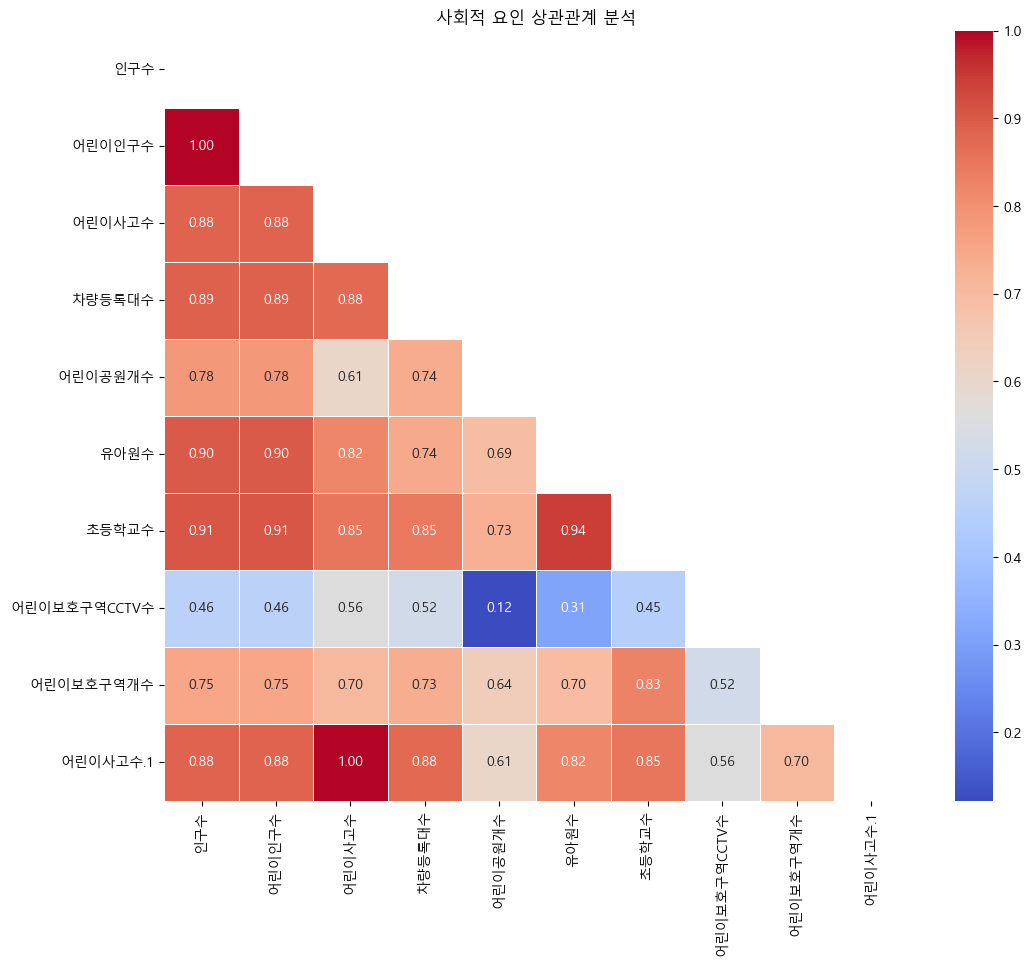

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 데이터 읽기
file_path = "종합서울DB.csv"
df = pd.read_csv(file_path, encoding='cp949')

# '지역구', '유치원수', '어린이집수', '초등학교수' 컬럼 삭제
df = df.drop(columns=['지역구', '유치원수', '어린이집수'])

# 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 상관관계 계산
correlation_matrix = df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))

# 상관관계 행렬의 아래 삼각형에 마스크 생성
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title("사회적 요인 상관관계 분석")
plt.show()

In [47]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
from folium import plugins

# CSV 파일 읽기
csv_path = 'merged_result.csv'
df = pd.read_csv(csv_path)

# GeoJSON 데이터의 URL
url = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

raw_data = [
    ['양천구', 0.25],
    ['영등포구', 0.24],
    ['중랑구', 0.24],
    ['구로구', 0.23],
    ['강남구', 0.22],
    ['송파구', 0.21],
    ['광진구', 0.21],
    ['강동구', 0.2],
    ['종로구', 0.19],
    ['강북구', 0.19],
    ['서초구', 0.19],
    ['성북구', 0.19],
    ['금천구', 0.19],
    ['은평구', 0.18],
    ['동대문구', 0.18],
    ['노원구', 0.17],
    ['강서구', 0.17],
    ['동작구', 0.17],
    ['용산구', 0.16],
    ['도봉구', 0.16],
    ['중구', 0.16],
    ['마포구', 0.16],
    ['서대문구', 0.15],
    ['성동구', 0.13],
    ['관악구', 0.12],
]

data = pd. DataFrame(raw_data, columns=['name','value'])
data

# GeoJSON 데이터 불러오기
response = requests.get(url)
geojson_data = response.json()

# 서울 중심에 지도 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# 마커 클러스터 생성
marker_cluster = MarkerCluster().add_to(seoul_map)

# 사고 내역을 지도에 추가
for index, row in df.iterrows():
    # 마커 추가
    folium.Marker([row['lat(위도)'], row['lon(경도)']], 
                  popup=f"<b>{row['사고내용']}</b><br>사망자: {row['사망자수']}명<br>중상자: {row['중상자수']}명<br>경상자: {row['경상자수']}명<br>부상신고자: {row['부상신고자수']}명",
                  icon=folium.Icon(color='red')).add_to(marker_cluster)
    
# MiniMap 추가
minimap = plugins.MiniMap()
seoul_map.add_child(minimap)

# 제목 추가
title_html = '''
             <h3 align="center" style="font-size:20px"><b>서울시 어린이사고 클러스터</b></h3>
             '''

seoul_map.get_root().html.add_child(folium.Element(title_html))

# 지도를 HTML 파일로 저장
seoul_map.save("seoul_child_accidents_map_cluster.html")


In [48]:
import webbrowser

# 생성된 HTML 파일 열기
webbrowser.open('seoul_child_accidents_map_cluster.html')


True

In [49]:
import folium
from folium.plugins import HeatMap
import pandas as pd
from folium import plugins

# CSV 파일 읽기
csv_path = 'merged_result.csv'
df = pd.read_csv(csv_path)

# 서울 중심에 지도 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# 히트맵 데이터 생성
heat_data = [[row['lat(위도)'], row['lon(경도)']] for index, row in df.iterrows()]

# 히트맵 생성
HeatMap(heat_data).add_to(seoul_map)

# MiniMap 추가
minimap = plugins.MiniMap()
seoul_map.add_child(minimap)

# 제목 추가
title_html = '''
             <h3 align="center" style="font-size:20px"><b>서울시 어린이사고 히트맵</b></h3>
             '''

seoul_map.get_root().html.add_child(folium.Element(title_html))

# 지도를 HTML 파일로 저장
seoul_map.save("seoul_child_accidents_heatmap.html")


In [50]:
import webbrowser

# 생성된 HTML 파일 열기
webbrowser.open('seoul_child_accidents_heatmap.html')

True

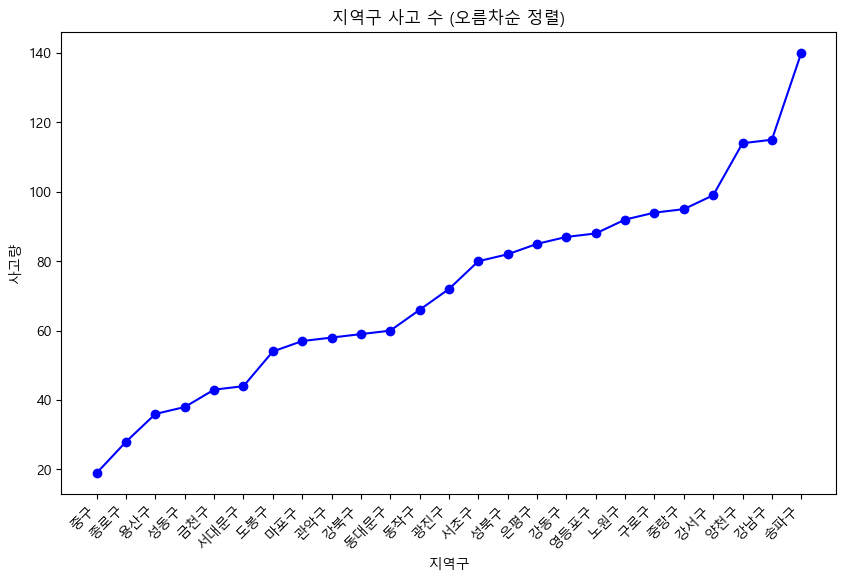

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = 'merged_result.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')

# '시군구' 컬럼에서 첫번째 영역 추출하여 새로운 컬럼 생성
df['지역구'] = df['시군구'].apply(lambda x: x.split()[1] if pd.notnull(x) and isinstance(x, str) else None)

# '지역' 컬럼을 기준으로 그룹화하여 사고 수 계산
지역별_사고수 = df['지역구'].value_counts().sort_index()

# 오름차순 정렬
지역별_사고수 = 지역별_사고수.sort_values()

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(지역별_사고수.index, 지역별_사고수.values, marker='o', color='b', linestyle='-')
plt.title('지역구 사고 수 (오름차순 정렬)')
plt.xlabel('지역구')
plt.ylabel('사고량')
plt.xticks(rotation=45, ha='right')  # x축 라벨 회전
plt.show()

In [52]:
# !pip install scikit-learn

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기 (인코딩 지정)
data = pd.read_csv('종합서울DB2.csv', encoding='cp949')

# 결측치 확인 및 처리
data.isnull().sum()

# 예측에 사용할 특성 선택 (상관관계가 높은 특성들을 선택하거나 도메인 지식 활용)
selected_features = data[['인구수', '어린이인구수', '차량등록대수', '어린이공원개수', '어린이집수', '유치원수', '초등학교수', '어린이보호구역CCTV수', '어린이보호구역개수']]

# 타겟 변수 설정
target = data['어린이사고수']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42)

# 데이터 표준화 (선택적으로 진행)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 결과 저장
data['예측어린이사고수'] = model.predict(scaler.transform(selected_features))
data.to_csv('종합서울DB2_with_predictions.csv', index=False)

Mean Squared Error: 601475994.3687235
R-squared: 0.8613202277823218


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기 (인코딩 지정)
data = pd.read_csv('종합서울DB2.csv', encoding='cp949')

# 예측에 사용할 특성 선택 (상관관계가 높은 특성들을 선택하거나 도메인 지식 활용)
selected_features = data[['인구수', '어린이인구수', '차량등록대수', '어린이공원개수', '어린이집수', '유치원수', '초등학교수', '어린이보호구역CCTV수', '어린이보호구역개수']]

# 타겟 변수 설정
target = data['어린이사고수']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42)

# 데이터 표준화 (선택적으로 진행)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델들 초기화
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse}, R-squared: {r2}')

# 선택된 모델로 예측
selected_model = models['Random Forest']
data['예측어린이사고수'] = selected_model.predict(scaler.transform(selected_features))

# 결과 저장 (인덱스 제외)
data.to_csv('종합서울DB2_with_predictions_rf22.csv', index=False)

Decision Tree - Mean Squared Error: 304420187.6, R-squared: 0.9298111268444895
Random Forest - Mean Squared Error: 501037437.1938998, R-squared: 0.8844779204604738
Gradient Boosting - Mean Squared Error: 245620450.98773757, R-squared: 0.9433683330442255


In [ ]:
# 트리 기반 앙상블
# 장점:
# 비선형 패턴을 잘 모델링할 수 있습니다.
# 여러 트리를 결합하여 과적합을 줄일 수 있습니다.
# 변수의 중요도를 제공해 특성의 상대적인 영향을 파악할 수 있습니다.
# 단점:
# 해석이 어려울 수 있습니다.
# 트리 개수나 깊이 등의 하이퍼파라미터를 조정해야 할 필요가 있습니다.

# 선형 회귀
# 장점:
# 단순하고 해석이 쉽습니다.
# 계수를 통해 각 특성의 영향을 직접 해석할 수 있습니다.
# 선형적인 관계를 잘 모델링할 수 있습니다.
# 단점:
# 비선형 패턴을 잘 모델링하지 못합니다.
# 특히, 상호작용이나 다항식과 같은 복잡한 관계를 잡아내기 어렵습니다.

# 선택 기준:
# 데이터 특성: 데이터가 선형적인 관계를 갖고 있거나 단순한 패턴일 경우 선형 회귀가 적합할 수 있습니다. 
# 그러나 데이터가 복잡하거나 비선형 패턴을 갖고 있다면 트리 기반 앙상블이 더 적합할 수 있습니다.
# 해석가능성: 모델의 해석이 중요한 경우 선형 회귀가 더 적합할 수 있습니다. 트리 기반 앙상블은 해석이 어려울 수 있지만, 변수의 중요도를 통해 상대적인 영향을 파악할 수 있습니다.
# 성능: 두 모델의 성능을 비교해보고, 교차 검증 등을 통해 모델의 일반화 성능을 평가하면서 선택할 수 있습니다.
# 모델 해석이 가능하면서 복잡한 패턴을 잘 모델링하고자 하는 경우: 트리 기반 앙상블 모델을 선택하는 것도 고려해볼 만합니다.

In [55]:
import pandas as pd

# 서울예측DB.csv 파일 불러오기
seoul_predictions = pd.read_csv('서울예측DB(트리).csv', encoding='cp949')

# 예측 결과와 실제 어린이사고수를 비교하는 DataFrame 생성
comparison_df = pd.DataFrame({
    '지역구': seoul_predictions['지역구'],
    '어린이사고수': seoul_predictions['어린이사고수'],
    '예측어린이사고수': seoul_predictions['예측어린이사고수']
})

# 결과 출력
print(comparison_df)

      지역구  어린이사고수   예측어린이사고수
0    종로구       28   69981.19
1     중구       19   63579.55
2    용산구       36   78811.54
3    성동구       38   99051.64
4    광진구       72  100554.83
5   동대문구       60   99213.77
6    중랑구       95  121200.65
7    성북구       82  132227.67
8    강북구       59   93368.51
9    도봉구       54  102904.59
10   노원구       92  166007.47
11   은평구       85  131656.66
12  서대문구       44   90066.26
13   마포구       57  116462.68
14   양천구      114  163304.00
15   강서구       99  192585.89
16   구로구       94  132280.44
17   금천구       43   88571.27
18  영등포구       88  131943.90
19   동작구       66  109352.55
20   관악구       58  124486.24
21   서초구       80  155843.54
22   강남구      115  193599.00
23   송파구      140  199729.79
24   강동구       87  142419.16


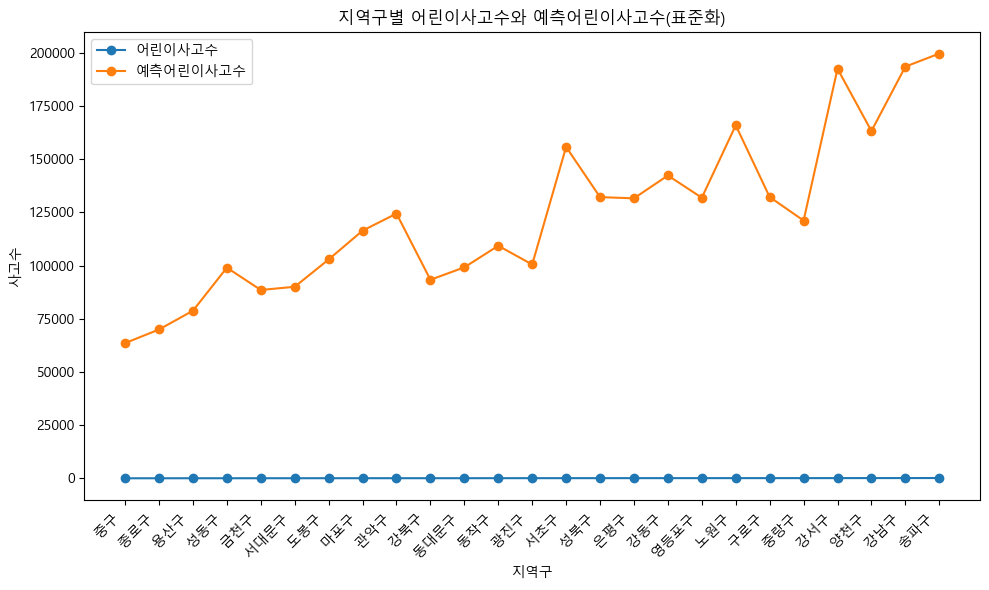

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# 서울예측DB.csv 파일 불러오기
seoul_predictions = pd.read_csv('서울예측DB(트리).csv', encoding='cp949')

# 어린이사고수를 기준으로 데이터 정렬
sorted_df = seoul_predictions.sort_values(by='어린이사고수')

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(sorted_df['지역구'], sorted_df['어린이사고수'], label='어린이사고수', marker='o')
plt.plot(sorted_df['지역구'], sorted_df['예측어린이사고수'], label='예측어린이사고수', marker='o')

plt.title('지역구별 어린이사고수와 예측어린이사고수(표준화)')
plt.xlabel('지역구')
plt.ylabel('사고수')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

C:\Users\ogi\AppData\Local\Temp\ipykernel_15556\4060677862.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_df['지역구'], rotation=45, ha='right')


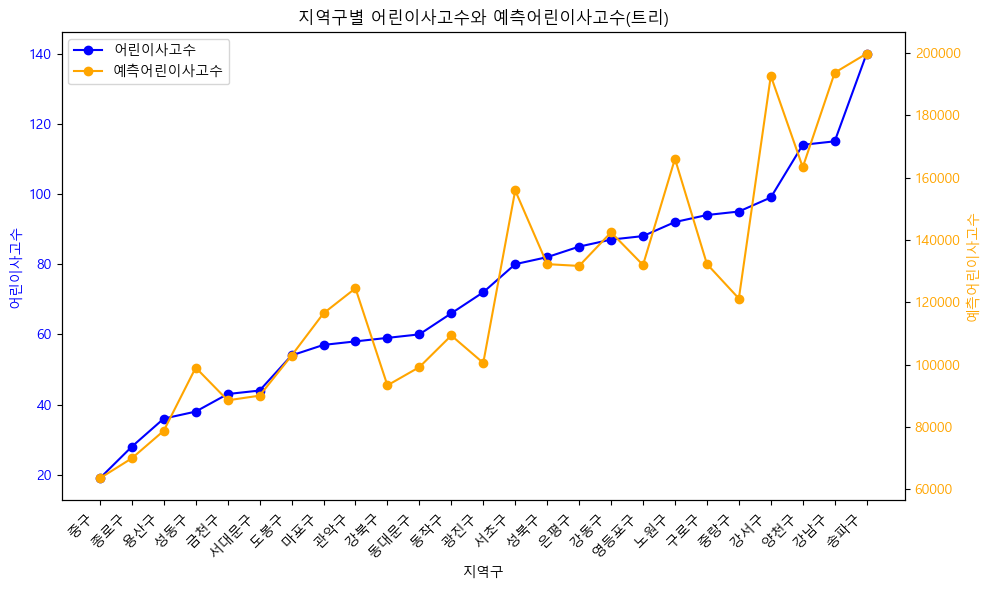

In [57]:
# 꺾은선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 어린이사고수 그래프
ax1.plot(sorted_df['지역구'], sorted_df['어린이사고수'], label='어린이사고수', marker='o', color='blue')
ax1.set_xlabel('지역구')
ax1.set_ylabel('어린이사고수', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 예측어린이사고수 그래프 (새로운 Y축 사용)
ax2 = ax1.twinx()
ax2.plot(sorted_df['지역구'], sorted_df['예측어린이사고수'], label='예측어린이사고수', marker='o', color='orange')
ax2.set_ylabel('예측어린이사고수', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# X축의 텍스트 45도 회전
ax1.set_xticklabels(sorted_df['지역구'], rotation=45, ha='right')

# 제목과 범례 추가
plt.title('지역구별 어린이사고수와 예측어린이사고수(트리)')
fig.tight_layout()

# 범례 표시
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [58]:
import pandas as pd

# 서울예측DB.csv 파일 불러오기
seoul_predictions = pd.read_csv('서울예측DB2(선형회귀모델).csv', encoding='cp949')

# 예측 결과와 실제 어린이사고수를 비교하는 DataFrame 생성
comparison_df = pd.DataFrame({
    '지역구': seoul_predictions['지역구'],
    '어린이사고수': seoul_predictions['어린이사고수'],
    '예측어린이사고수': seoul_predictions['예측어린이사고수']
})

# 결과 출력
print(comparison_df)

      지역구  어린이사고수      예측어린이사고수
0    종로구       28   60452.78709
1     중구       19   49382.39620
2    용산구       36   73289.84637
3    성동구       38   85757.98153
4    광진구       72  120995.76620
5   동대문구       60  110631.02920
6    중랑구       95  122374.93460
7    성북구       82  122403.05790
8    강북구       59  110284.29380
9    도봉구       54   95539.54680
10   노원구       92  153267.79650
11   은평구       85  137238.53510
12  서대문구       44   91244.46930
13   마포구       57  113356.03470
14   양천구      114  180373.38370
15   강서구       99  187284.59820
16   구로구       94  121062.14070
17   금천구       43   88172.57404
18  영등포구       88  107075.73010
19   동작구       66  110164.23090
20   관악구       58  141359.16260
21   서초구       80  169743.13080
22   강남구      115  212582.14460
23   송파구      140  206708.02100
24   강동구       87  147899.18590


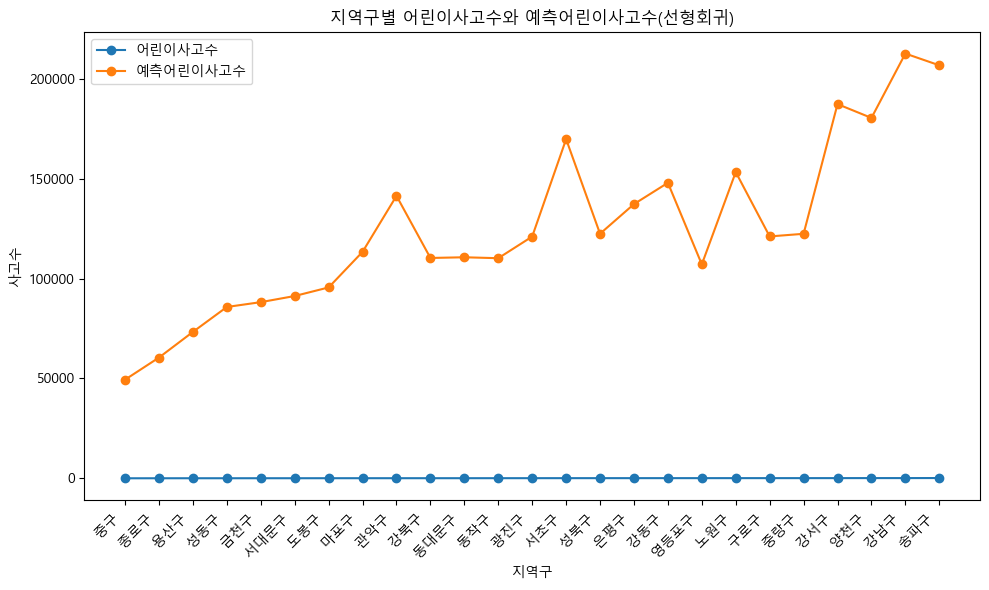

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# 서울예측DB.csv 파일 불러오기
seoul_predictions = pd.read_csv('서울예측DB2(선형회귀모델).csv', encoding='cp949')

# 어린이사고수를 기준으로 데이터 정렬
sorted_df = seoul_predictions.sort_values(by='어린이사고수')

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(sorted_df['지역구'], sorted_df['어린이사고수'], label='어린이사고수', marker='o')
plt.plot(sorted_df['지역구'], sorted_df['예측어린이사고수'], label='예측어린이사고수', marker='o')

plt.title('지역구별 어린이사고수와 예측어린이사고수(선형회귀)')
plt.xlabel('지역구')
plt.ylabel('사고수')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

C:\Users\ogi\AppData\Local\Temp\ipykernel_15556\517542233.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_df['지역구'], rotation=45, ha='right')


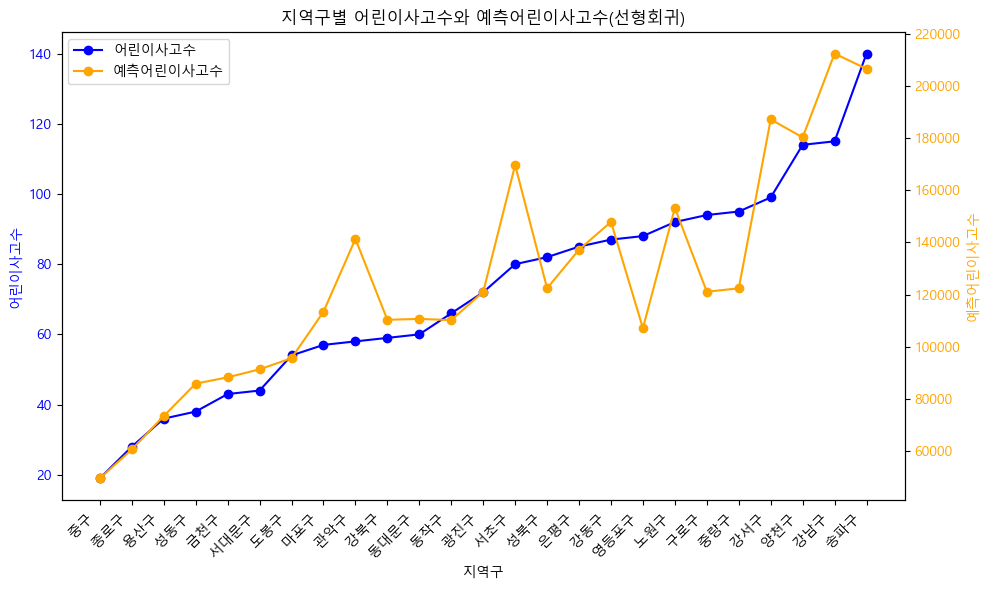

In [60]:
# 꺾은선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 어린이사고수 그래프
ax1.plot(sorted_df['지역구'], sorted_df['어린이사고수'], label='어린이사고수', marker='o', color='blue')
ax1.set_xlabel('지역구')
ax1.set_ylabel('어린이사고수', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 예측어린이사고수 그래프 (새로운 Y축 사용)
ax2 = ax1.twinx()
ax2.plot(sorted_df['지역구'], sorted_df['예측어린이사고수'], label='예측어린이사고수', marker='o', color='orange')
ax2.set_ylabel('예측어린이사고수', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# X축의 텍스트 45도 회전
ax1.set_xticklabels(sorted_df['지역구'], rotation=45, ha='right')

# 제목과 범례 추가
plt.title('지역구별 어린이사고수와 예측어린이사고수(선형회귀)')
fig.tight_layout()

# 범례 표시
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 불러오기
data_linear = pd.read_csv('종합서울DB2_with_predictions.csv')
data_ensemble = pd.read_csv('종합서울DB2_with_predictions_rf22.csv')

# 실제값
y_true = data_linear['어린이사고수']

# 선형 회귀 모델의 예측값
y_pred_linear = data_linear['예측어린이사고수']

# 트리 기반 앙상블 모델의 예측값
y_pred_ensemble = data_ensemble['예측어린이사고수']

# MSE 계산
mse_linear = mean_squared_error(y_true, y_pred_linear)
mse_ensemble = mean_squared_error(y_true, y_pred_ensemble)

# R-squared 계산
r2_linear = r2_score(y_true, y_pred_linear)
r2_ensemble = r2_score(y_true, y_pred_ensemble)

print(f'Linear Regression - MSE: {mse_linear}, R-squared: {r2_linear}')
print(f'Ensemble Model - MSE: {mse_ensemble}, R-squared: {r2_ensemble}')

# 정확도 차이 계산
accuracy_difference = mse_linear - mse_ensemble
print(f'Accuracy Difference (MSE): {accuracy_difference}')

Linear Regression - MSE: 315313620.9300847, R-squared: 0.8664648041939895
Ensemble Model - MSE: 242369138.33750793, R-squared: 0.897356764196338
Accuracy Difference (MSE): 72944482.59257677


In [ ]:
# 해석 결과

# Linear Regression - MSE: 315313620.9300847, R-squared: 0.8664648041939895:
# 선형 회귀 모델의 평균 제곱 오차(MSE)는 약 3.15억이며, R-squared 값은 약 0.87입니다.
# R-squared 값이 1에 가까울수록 모델이 종속 변수를 얼마나 잘 설명하는지를 나타냅니다. 0.87은 상당히 높은 설명력을 나타냅니다.
# Ensemble Model - MSE: 242369138.33750793, R-squared: 0.897356764196338:

# 트리 기반 앙상블 모델의 평균 제곱 오차(MSE)는 약 2.42억이며, R-squared 값은 약 0.90입니다.
# R-squared 값이 0.90으로 선형 회귀 모델보다 더 높은 설명력을 가지고 있습니다.
# Accuracy Difference (MSE): 72944482.59257677:

# 두 모델 간의 평균 제곱 오차(MSE)의 차이는 약 7,294만입니다. 이 값은 두 모델의 예측 성능의 차이를 나타냅니다.
# 트리 기반 앙상블 모델이 선형 회귀 모델보다 MSE가 낮으므로, 트리 기반 앙상블 모델이 더 나은 예측 성능을 보이고 있습니다.